# Data Loading

In [2]:
import pandas as pd

df = pd.read_csv('../data/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


#  Basic Overview

In [3]:
print("Shape of dataset:", df.shape)

Shape of dataset: (45000, 14)


In [4]:
print("\nData Types:\n", df.dtypes)


Data Types:
 person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
          person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   

In [7]:
df.duplicated().sum()  # Check for duplicates

np.int64(0)

In [8]:
df.isnull().sum()  # Check for missing values

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# EDA

### Check Class Balance (Target Variable)

C:\Users\jagad\AppData\Local\Temp\ipykernel_8544\604354017.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, palette="Set2")


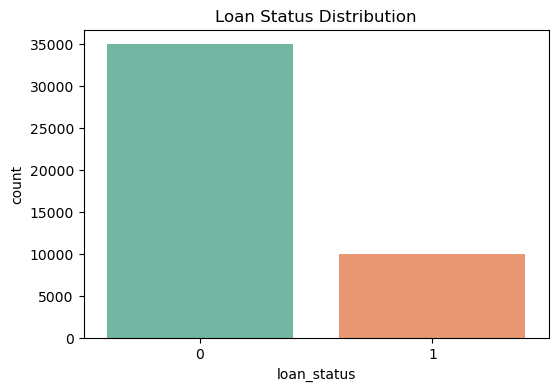

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../artifacts", exist_ok=True)

plt.figure(figsize=(6,4))
sns.countplot(x="loan_status", data=df, palette="Set2")
plt.title("Loan Status Distribution")
plt.savefig("../artifacts/loan_status_distribution.png")
plt.show()

- Categorical Feature Analysis

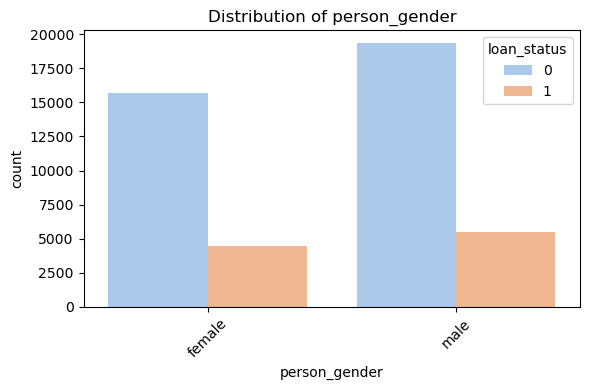

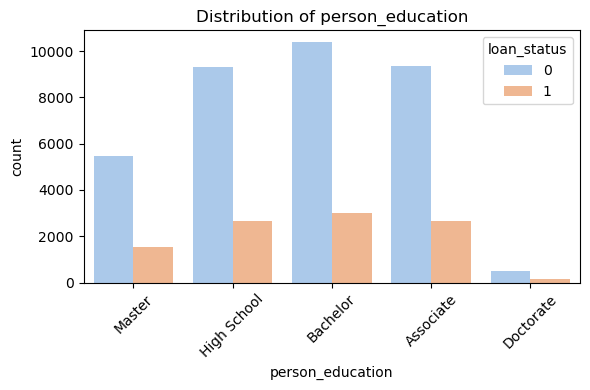

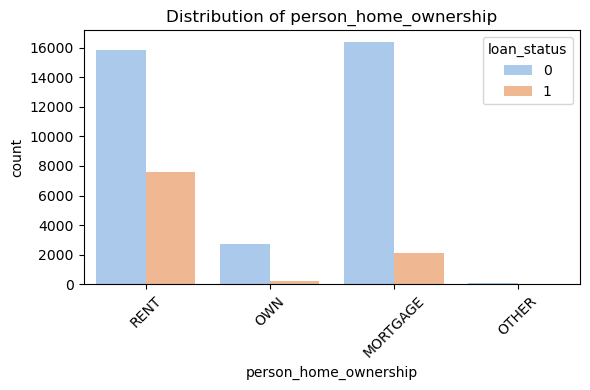

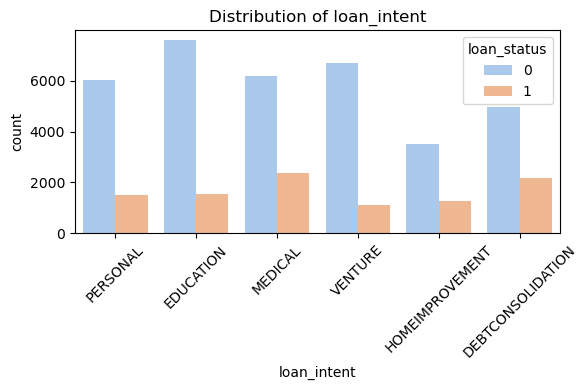

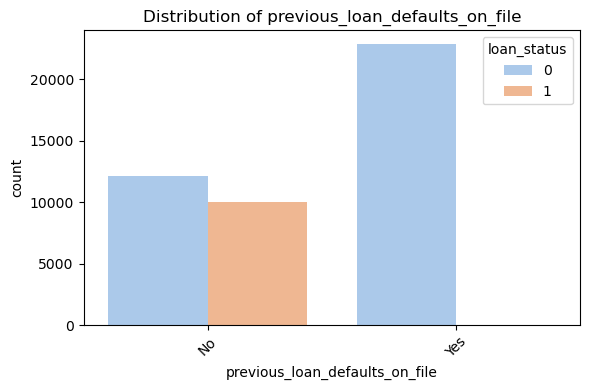

In [10]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership',
                    'loan_intent', 'previous_loan_defaults_on_file']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="pastel", hue="loan_status")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"../artifacts/{col}_distribution.png")
    plt.show()

- Numerical Feature Analysis

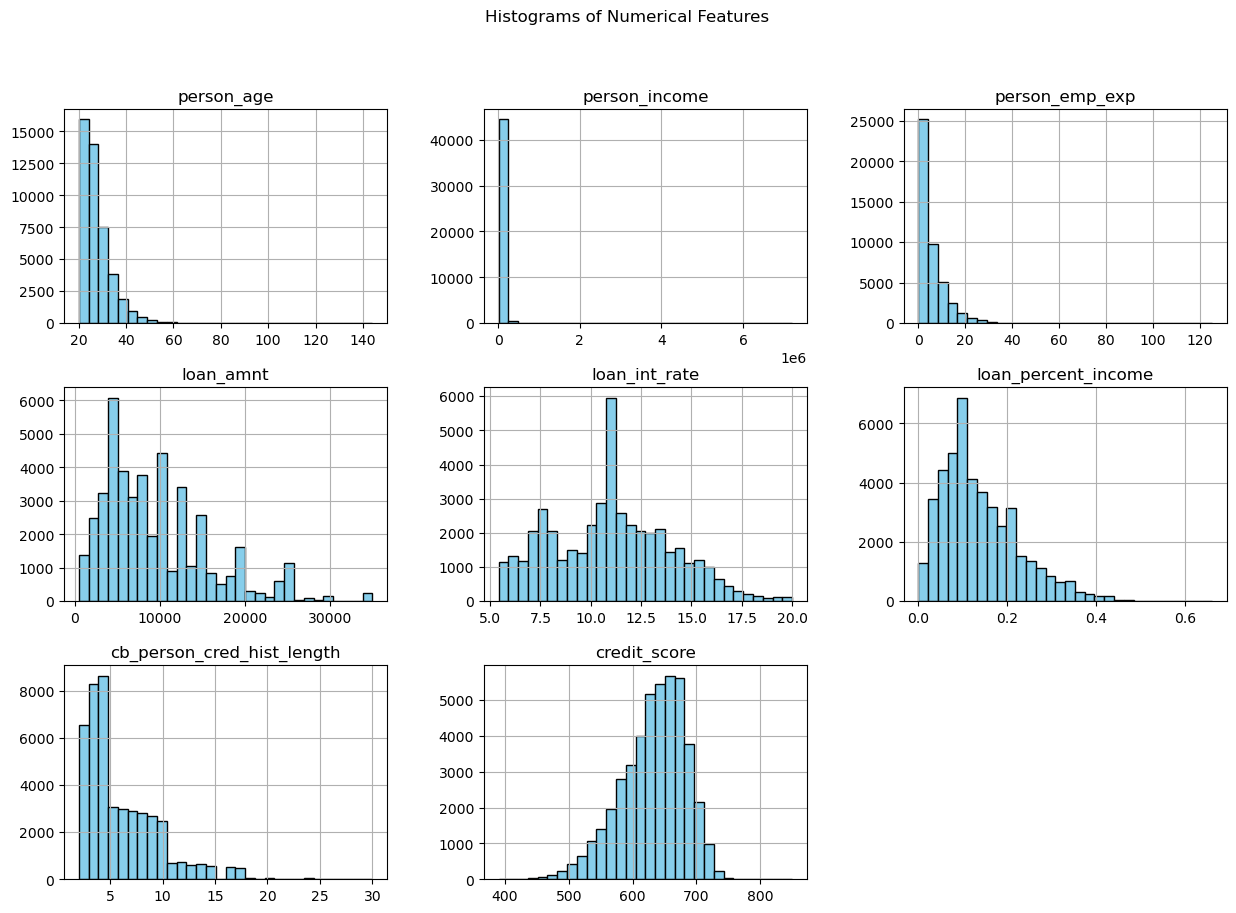

In [11]:
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                  'loan_int_rate', 'loan_percent_income',
                  'cb_person_cred_hist_length', 'credit_score']


df[numerical_cols].hist(bins=30, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.savefig("../artifacts/numerical_histograms.png")
plt.show()

- Correlation Analysis

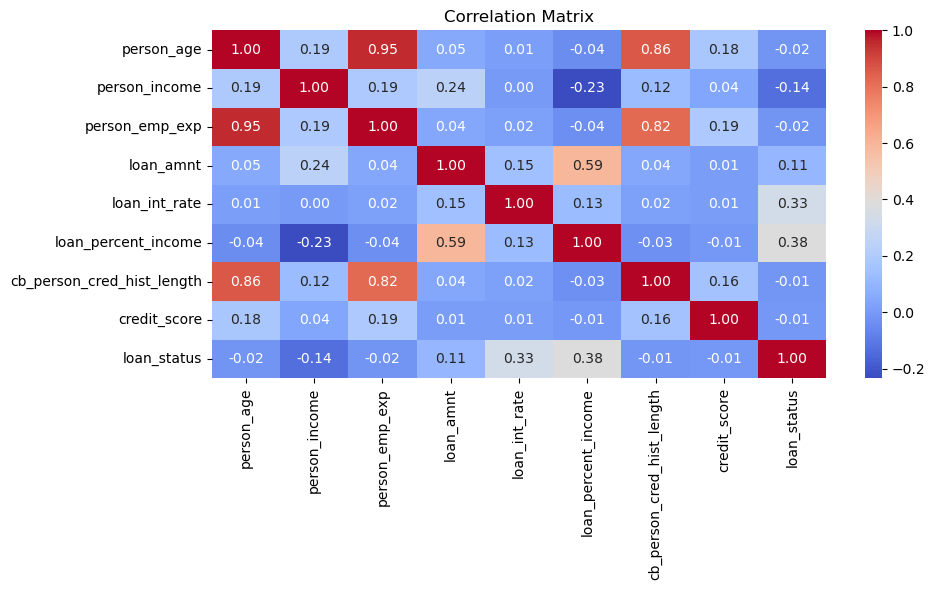

In [12]:
plt.figure(figsize=(10,6))
corr = df[numerical_cols + ['loan_status']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("../artifacts/correlation_matrix.png")
plt.show()

- Outlier Detection

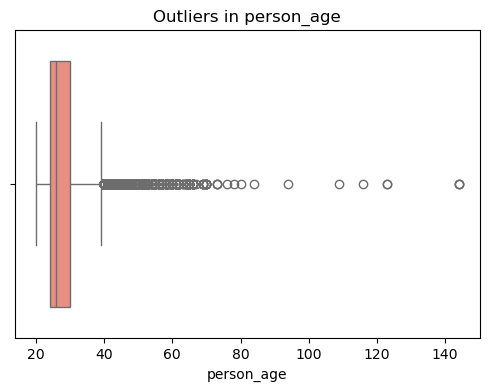

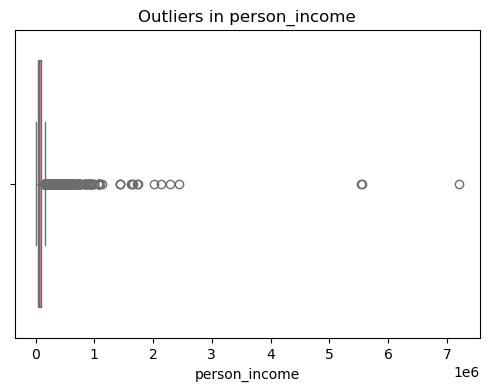

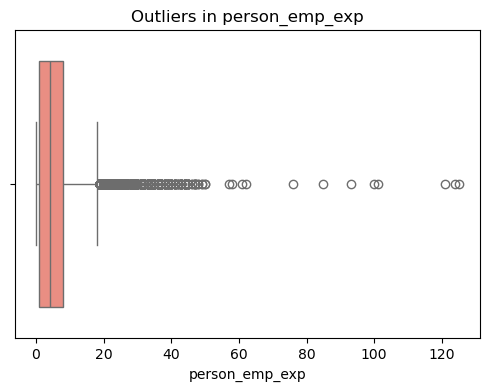

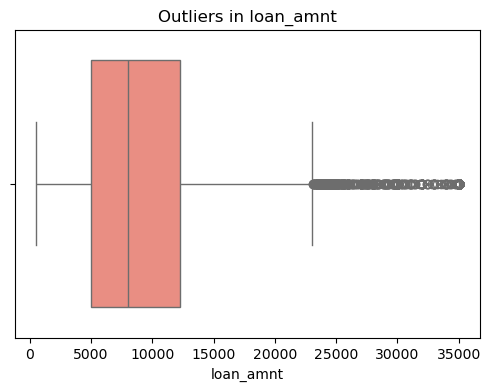

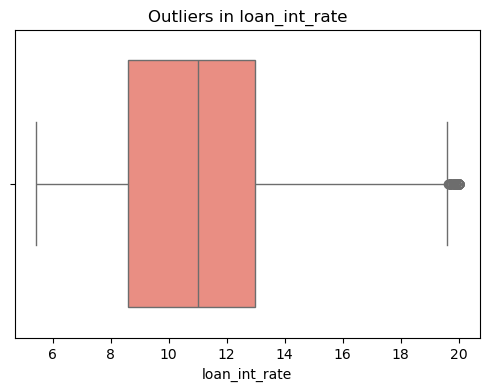

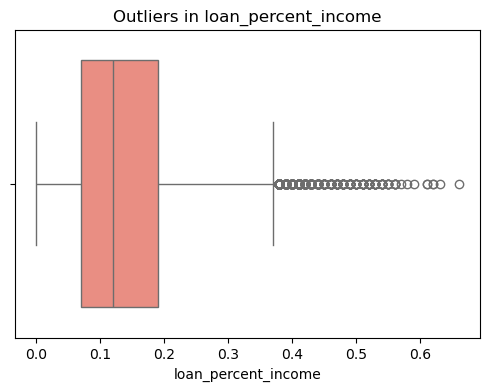

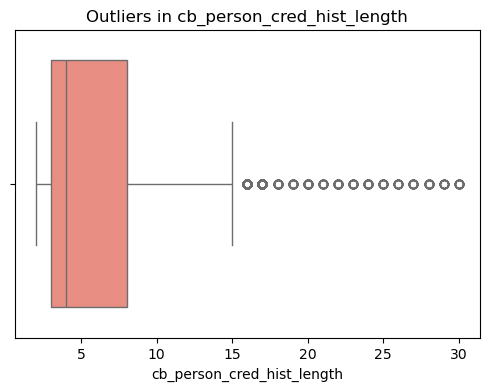

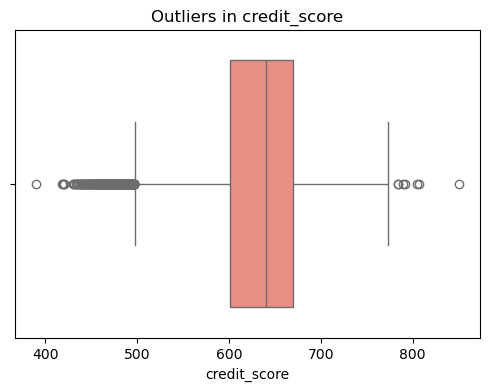

In [13]:
from scipy.stats import zscore
import numpy as np

outlier_report = {}
for col in numerical_cols:
    z_scores = zscore(df[col])
    outliers = np.where(np.abs(z_scores) > 3)[0]
    outlier_report[col] = len(outliers)

with open("../artifacts/outlier_report.txt", "w") as f:
    for col, count in outlier_report.items():
        f.write(f"{col}: {count} outliers detected\n")

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f"Outliers in {col}")
    plt.savefig(f"../artifacts/{col}_outliers.png")
    plt.show()

# Handling Skewness & Outliers

In [ ]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

skewness_values = df[numerical_cols].apply(lambda x: skew(x))
skew_df = pd.DataFrame({ "Skewness": skewness_values})
skew_df

,Skewness
person_age,2.548069
person_income,34.136445
person_emp_exp,2.594831
loan_amnt,1.179692
loan_int_rate,0.213777
loan_percent_income,1.034478
cb_person_cred_hist_length,1.631666
credit_score,-0.610240


In [17]:
pt = PowerTransformer(method='yeo-johnson')
df[numerical_cols] = pt.fit_transform(df[numerical_cols])

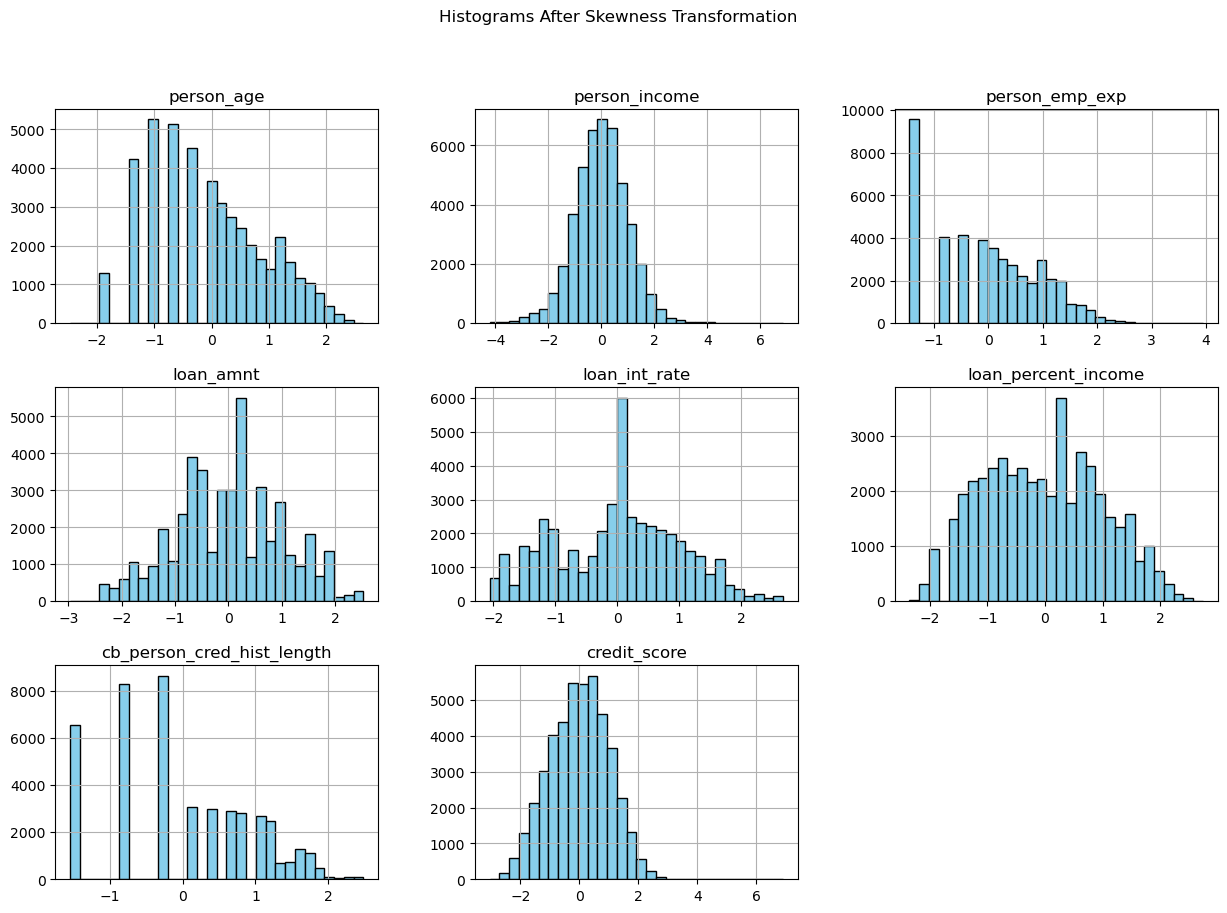

In [19]:
df[numerical_cols].hist(bins=30, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms After Skewness Transformation")
plt.savefig("../artifacts/histograms_after_transformation.png")
plt.show()

In [20]:
outlier_counts = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

df.to_csv("../data/cleaned_loan_data.csv", index=False)
print("Cleaned dataset saved to ../data/cleaned_loan_data.csv")

Cleaned dataset saved to ../data/cleaned_loan_data.csv
